# Testing vs. Race in Illinois 
Written by: Sean Lee

Write Date: June 3, 2020

Last Updated: June 7, 2020

This script generates views used to analyze testing behavior in the state of Illinois.

In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from datetime import datetime
import matplotlib.ticker as mtick


In [67]:
# Get today's data from covidtracking.com and write to local directory as txt file
testing = requests.get("https://covidtracking.com//api/v1/us/daily.csv")
testing = testing.text
date = datetime.now().strftime('%Y%m%d')
filename = "testing_data_{}.txt".format(date)
with open(filename,'w') as writefile:
    for line in testing:
        writefile.write(line)

,date,positive,negative,datetime,new_pos,new_neg,tpp,roll_mean
82,20200315,5188,34144.0,2020-03-15,1078.0,6522.0,14.184211,13.117143
81,20200316,6650,50523.0,2020-03-16,1462.0,16379.0,8.194608,12.230723
80,20200317,8863,63993.0,2020-03-17,2213.0,13470.0,14.110821,12.359005
79,20200318,11582,86008.0,2020-03-18,2719.0,22015.0,10.992965,12.271265
78,20200319,15967,109294.0,2020-03-19,4385.0,23286.0,15.846916,12.964144
...,...,...,...,...,...,...,...,...
4,20200601,1799761,15540921.0,2020-06-01,16191.0,387600.0,4.009748,5.358950
3,20200602,1823269,15934569.0,2020-06-02,23508.0,393648.0,5.635302,5.397640
2,20200603,1843315,16371635.0,2020-06-03,20046.0,437066.0,4.385359,5.088932
1,20200604,1864112,16816417.0,2020-06-04,20797.0,444782.0,4.466911,4.940130


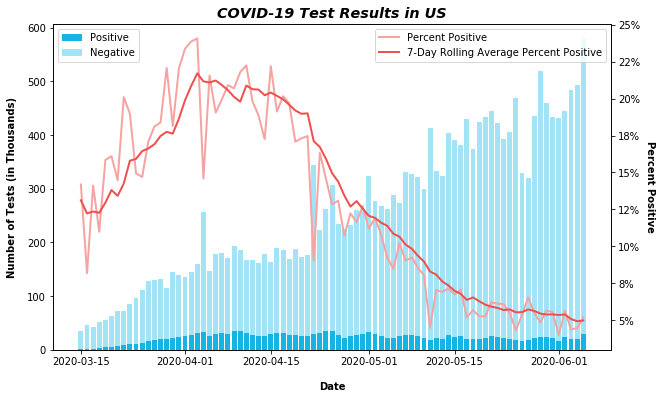

In [26]:
# Read CSV into pandas dataframe
date = datetime.now().strftime('%Y%m%d')
filename = "testing_data_{}.txt".format(date)
testing = pd.read_csv(filename)
testing = testing[['date','positive','negative']]

# Add properly formatted date and sort by date
testing['datetime'] = pd.to_datetime(testing['date'], format='%Y%m%d')
testing = testing.sort_values(by=['date'],ascending=True)

# Generate incremental columns, testing percent positive (TPP) column, and rolling average column
testing['new_pos'] = testing.positive.diff()
testing['new_neg'] = testing.negative.diff()
testing['tpp']=100*testing['new_pos']/(testing['new_pos']+testing['new_neg'])
testing['roll_mean'] = testing.tpp.rolling(window=7).mean()

# slice
testing = testing[testing['datetime']>='2020-03-15']

# Plot the data
fig, ax1 = plt.subplots(figsize=(10,6))

# Number of Tests, Bars
ax1.bar(testing['datetime'],testing['new_pos']/1000,color = '#15b4e5')
ax1.bar(testing['datetime'],testing['new_neg']/1000,bottom = testing['new_pos']/1000,color = '#a2e3f6')
ax1.set_xlabel('Date',fontweight='bold',labelpad = 15)
ax1.set_ylabel('Number of Tests (in Thousands)',fontweight='bold',labelpad = 10)

# TPP, Lines
ax2 = ax1.twinx()
ax2.plot(testing['datetime'],testing['tpp'],color = '#f6a3a2',linewidth = 2)
ax2.plot(testing['datetime'],testing['roll_mean'], color = '#ef504e',linewidth = 2)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
ax2.set_ylabel('Percent Positive',fontweight='bold',rotation='270',labelpad=15)

# ax1.legend(['Positive','Negative'],bbox_to_anchor=(0.5, -0.3),loc='lower left')
# ax2.legend(['Percent Positive','7-Day Rolling Average Percent Positive'],bbox_to_anchor=(0.5, -0.3),loc='lower right')

# Legend and Labels
ax1.legend(['Positive','Negative'],loc='best')
ax2.legend(['Percent Positive','7-Day Rolling Average Percent Positive'],loc='best')

plt.title('COVID-19 Test Results in US',fontweight = 'bold',fontstyle = 'italic',fontsize='x-large')
plt.savefig('US_TPP_{}'.format(date))
testing.head(1000)


,Date,State,P_Total,N_Total,datetime,new_pos,new_neg,tpp
744,20200415,IL,24593.0,27347.0,2020-04-15,3741.0,3767.0,49.826851
688,20200419,IL,30357.0,33561.0,2020-04-19,5764.0,6214.0,48.121556
576,20200426,IL,43903.0,40082.0,2020-04-26,8795.0,10240.0,46.204360
520,20200429,IL,50355.0,47978.0,2020-04-29,6452.0,7896.0,44.967940
464,20200503,IL,61499.0,59765.0,2020-05-03,11144.0,11787.0,48.597968
408,20200506,IL,68232.0,68299.0,2020-05-06,6733.0,8534.0,44.101657
352,20200510,IL,77741.0,83605.0,2020-05-10,9509.0,15306.0,38.319565
296,20200513,IL,84698.0,95034.0,2020-05-13,6957.0,11429.0,37.838573
240,20200517,IL,94191.0,117891.0,2020-05-17,9493.0,22857.0,29.344668
184,20200520,IL,100418.0,132565.0,2020-05-20,6227.0,14674.0,29.792833


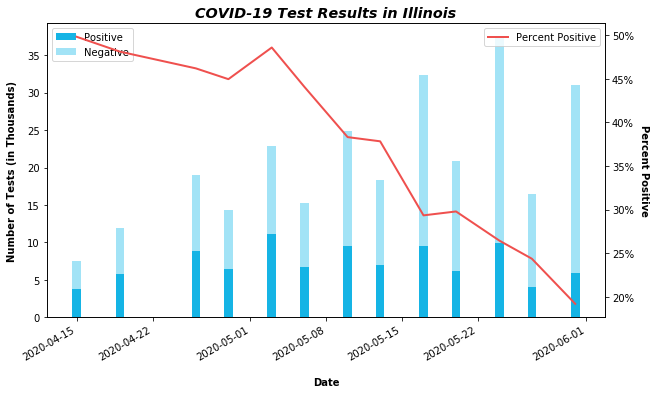

In [28]:
# Read CSV into pandas dataframe
date = datetime.now().strftime('%Y%m%d')
testing = pd.read_csv('Race_Data.csv')
testing = testing[['Date','State','P_Total','N_Total']]
testing = testing.sort_values(by=['State','Date'],ascending=True)
testing = testing[testing['State']=="IL"]
testing = testing.astype({"P_Total":float,"N_Total":float})

# Add properly formatted date and sort by date
testing['datetime'] = pd.to_datetime(testing['Date'], format='%Y%m%d')


# Generate incremental columns, testing percent positive (TPP) column, and rolling average column
testing['new_pos'] = testing.P_Total.diff()
testing['new_neg'] = testing.N_Total.diff()
testing['tpp']=100*testing['new_pos']/(testing['new_pos']+testing['new_neg'])

# slice
testing = testing[testing['datetime']!='2020-04-12']
testing = testing[testing['datetime']!='2020-04-22']

# Plot the data
fig, ax1 = plt.subplots(figsize=(10,6))

# # Number of Tests, Bars
height = testing['new_pos'].to_numpy()
ax1.bar(testing['datetime'],testing['new_pos']/1000,color = '#15b4e5',linewidth = 1)
ax1.bar(testing['datetime'],testing['new_neg']/1000,bottom = height/1000,color = '#a2e3f6')
ax1.set_xlabel('Date',fontweight='bold',labelpad = 15)
ax1.set_ylabel('Number of Tests (in Thousands)',fontweight='bold',labelpad = 10)

# TPP, Lines
ax2 = ax1.twinx()
ax2.plot(testing['datetime'],testing['tpp'],color = '#ef504e',linewidth = 2)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
ax2.set_ylabel('Percent Positive',fontweight='bold',rotation='270',labelpad=15)

# ax1.legend(['Positive','Negative'],bbox_to_anchor=(0.5, -0.3),loc='lower left')
# ax2.legend(['Percent Positive','7-Day Rolling Average Percent Positive'],bbox_to_anchor=(0.5, -0.3),loc='lower right')

# Legend and Labels
ax1.legend(['Positive','Negative'],loc='upper left')
ax2.legend(['Percent Positive'],loc='upper right')
ax1.xaxis_date()
fig.autofmt_xdate()

plt.title('COVID-19 Test Results in Illinois',fontweight = 'bold',fontstyle = 'italic',fontsize='x-large')
plt.savefig('IL_TPP_{}'.format(date))
testing.head(100)



,Date,State,P_White,P_Total,N_White,N_Total,datetime,new_pos_white,new_neg_white,new_pos_black,new_neg_black,tpp_white,tpp_black
800,20200412,IL,5214.0,20852.0,13233.0,23580.0,2020-04-12,NaN,NaN,NaN,NaN,NaN,NaN
744,20200415,IL,6127.0,24593.0,15504.0,27347.0,2020-04-15,913.0,2271.0,2828.0,1496.0,28.674623,65.402405
688,20200419,IL,7554.0,30357.0,19016.0,33561.0,2020-04-19,1427.0,3512.0,4337.0,2702.0,28.892488,61.613866
576,20200426,IL,10427.0,43903.0,16438.0,40082.0,2020-04-26,1854.0,3272.0,6941.0,6968.0,36.168552,49.902941
520,20200429,IL,11676.0,50355.0,18863.0,47978.0,2020-04-29,1249.0,2425.0,5203.0,5471.0,33.995645,48.744613
464,20200503,IL,13566.0,61499.0,22509.0,59765.0,2020-05-03,1890.0,3646.0,9254.0,8141.0,34.140173,53.199195
408,20200506,IL,14809.0,68232.0,24786.0,68299.0,2020-05-06,1243.0,2277.0,5490.0,6257.0,35.312500,46.735337
352,20200510,IL,16390.0,77741.0,29210.0,83605.0,2020-05-10,1581.0,4424.0,7928.0,10882.0,26.328060,42.147794
296,20200513,IL,17407.0,84698.0,31741.0,95034.0,2020-05-13,1017.0,2531.0,5940.0,8898.0,28.664036,40.032349
240,20200517,IL,19218.0,94191.0,37324.0,117891.0,2020-05-17,1811.0,5583.0,7682.0,17274.0,24.492832,30.782177


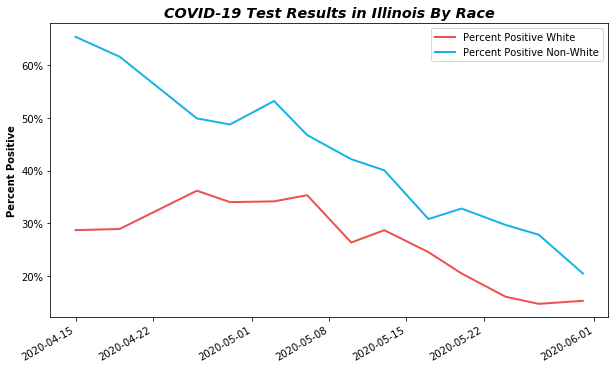

In [59]:
# Read CSV into pandas dataframe
date = datetime.now().strftime('%Y%m%d')
testing = pd.read_csv('Race_Data.csv')
testing = testing[['Date','State','P_White','P_Total','N_White','N_Total']]
testing = testing.sort_values(by=['State','Date'],ascending=True)
testing = testing[testing['State']=="IL"]
testing = testing.astype({"P_White":float,"N_White":float,"P_Total":float,"N_Total":float})

# Add properly formatted date and sort by date
testing['datetime'] = pd.to_datetime(testing['Date'], format='%Y%m%d')


# Generate incremental columns, testing percent positive (TPP) column, and rolling average column
testing['new_pos_white'] = testing.P_White.diff()
testing['new_neg_white'] = testing.N_White.diff()
testing['new_pos_black'] = testing.P_Total.diff()-testing.P_White.diff()
testing['new_neg_black'] = testing.N_Total.diff()-testing.N_White.diff()
testing['tpp_white']=100*testing['new_pos_white']/(testing['new_pos_white']+testing['new_neg_white'])
testing['tpp_black']=100*testing['new_pos_black']/(testing['new_pos_black']+testing['new_neg_black'])

# slice
testing = testing[testing['datetime']!='2020-04-22']

# Plot the data
fig, ax1 = plt.subplots(figsize=(10,6))

# # Number of Tests, Bars
# height = testing['new_pos'].to_numpy()
# ax1.bar(testing['datetime'],testing['new_pos']/1000,width,color = '#15b4e5',linewidth = 1)
# ax1.bar(testing['datetime'],testing['new_neg']/1000,width,bottom = height/1000,color = '#a2e3f6')
# ax1.set_xlabel('Date',fontweight='bold',labelpad = 15)
# ax1.set_ylabel('Number of Tests (in Thousands)',fontweight='bold',labelpad = 10)

# TPP, Lines
ax1.plot(testing['datetime'],testing['tpp_white'],color = '#ef504e',linewidth = 2)
ax1.plot(testing['datetime'],testing['tpp_black'],color = '#15b4e5',linewidth = 2)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
ax1.set_ylabel('Percent Positive',fontweight='bold')

# ax1.legend(['Positive','Negative'],bbox_to_anchor=(0.5, -0.3),loc='lower left')
# ax2.legend(['Percent Positive','7-Day Rolling Average Percent Positive'],bbox_to_anchor=(0.5, -0.3),loc='lower right')

# Legend and Labels
# ax1.legend(['Positive','Negative'],loc='upper left')
ax1.legend(['Percent Positive White','Percent Positive Non-White'],loc='upper right')
ax1.xaxis_date()
fig.autofmt_xdate()

plt.title('COVID-19 Test Results in Illinois By Race',fontweight = 'bold',fontstyle = 'italic',fontsize='x-large')
plt.savefig('IL_TPP_Race_{}'.format(date))
testing.head(100)





,Date,State,P_Total,P_White,P_Black,P_Lat,P_Asian,P_AIAN,P_NHPI,P_Other,...,N_AIAN,N_NHPI,N_Other,datetime,new_pos_white,new_neg_white,new_pos_black,new_neg_black,tpp_white,tpp_black
800,20200412,IL,20852.0,5214.0,5458.0,2513.0,691.0,24.0,28.0,988.0,...,62.0,NaN,52407.0,2020-04-12,NaN,NaN,NaN,NaN,NaN,NaN
744,20200415,IL,24593.0,6127.0,6331.0,3357.0,847.0,34.0,33.0,1117.0,...,70.0,NaN,60144.0,2020-04-15,913.0,2271.0,156.0,13.0,28.674623,92.307692
688,20200419,IL,30357.0,7554.0,7498.0,4913.0,1085.0,46.0,39.0,1324.0,...,78.0,NaN,72472.0,2020-04-19,1427.0,3512.0,238.0,26.0,28.892488,90.151515
576,20200426,IL,43903.0,10427.0,9918.0,8743.0,1523.0,65.0,52.0,1834.0,...,57.0,NaN,108957.0,2020-04-26,1854.0,3272.0,279.0,25.0,36.168552,91.776316
520,20200429,IL,50355.0,11676.0,10850.0,10846.0,1718.0,70.0,62.0,2031.0,...,60.0,NaN,122577.0,2020-04-29,1249.0,2425.0,195.0,15.0,33.995645,92.857143
464,20200503,IL,61499.0,13566.0,12240.0,14502.0,2001.0,82.0,67.0,2524.0,...,98.0,NaN,150673.0,2020-05-03,1890.0,3646.0,283.0,31.0,34.140173,90.127389
408,20200506,IL,68232.0,14809.0,13277.0,17240.0,2203.0,99.0,73.0,2766.0,...,112.0,NaN,171235.0,2020-05-06,1243.0,2277.0,202.0,14.0,35.312500,93.518519
352,20200510,IL,77741.0,16390.0,14369.0,20839.0,2408.0,126.0,123.0,3142.0,...,123.0,NaN,202667.0,2020-05-10,1581.0,4424.0,205.0,34.0,26.328060,85.774059
296,20200513,IL,84698.0,17407.0,15034.0,23259.0,2529.0,138.0,164.0,3390.0,...,198.0,NaN,236177.0,2020-05-13,1017.0,2531.0,121.0,18.0,28.664036,87.050360
240,20200517,IL,94191.0,19218.0,16616.0,27763.0,2830.0,159.0,219.0,3643.0,...,287.0,NaN,281652.0,2020-05-17,1811.0,5583.0,301.0,39.0,24.492832,88.529412


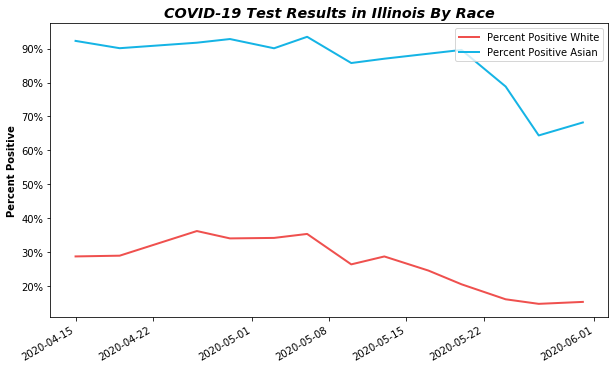

In [10]:
# Read CSV into pandas dataframe
date = datetime.now().strftime('%Y%m%d')
testing = pd.read_csv('Race_Data.csv')
testing = testing[['Date','State','P_Total','P_White','P_Black','P_Lat','P_Asian','P_AIAN','P_NHPI','P_Other',\
                   'N_Total','N_White','N_Black','N_Lat','N_Asian','N_AIAN','N_NHPI','N_Other']]
testing = testing.sort_values(by=['State','Date'],ascending=True)
testing = testing[testing['State']=="IL"]
testing = testing.astype({"P_White":float,"N_White":float,"P_Asian":float,"N_Asian":float})

# Add properly formatted date and sort by date
testing['datetime'] = pd.to_datetime(testing['Date'], format='%Y%m%d')


# Generate incremental columns, testing percent positive (TPP) column, and rolling average column
testing['new_pos_white'] = testing.P_White.diff()
testing['new_neg_white'] = testing.N_White.diff()
testing['new_pos_black'] = testing.P_Asian.diff()
testing['new_neg_black'] = testing.N_Asian.diff()
testing['tpp_white']=100*testing['new_pos_white']/(testing['new_pos_white']+testing['new_neg_white'])
testing['tpp_black']=100*testing['new_pos_black']/(testing['new_pos_black']+testing['new_neg_black'])

# slice
testing = testing[testing['datetime']!='2020-04-22']

# Plot the data
fig, ax1 = plt.subplots(figsize=(10,6))

# # Number of Tests, Bars
# height = testing['new_pos'].to_numpy()
# ax1.bar(testing['datetime'],testing['new_pos']/1000,width,color = '#15b4e5',linewidth = 1)
# ax1.bar(testing['datetime'],testing['new_neg']/1000,width,bottom = height/1000,color = '#a2e3f6')
# ax1.set_xlabel('Date',fontweight='bold',labelpad = 15)
# ax1.set_ylabel('Number of Tests (in Thousands)',fontweight='bold',labelpad = 10)

# TPP, Lines
ax1.plot(testing['datetime'],testing['tpp_white'],color = '#ef504e',linewidth = 2)
ax1.plot(testing['datetime'],testing['tpp_black'],color = '#15b4e5',linewidth = 2)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
ax1.set_ylabel('Percent Positive',fontweight='bold')

# ax1.legend(['Positive','Negative'],bbox_to_anchor=(0.5, -0.3),loc='lower left')
# ax2.legend(['Percent Positive','7-Day Rolling Average Percent Positive'],bbox_to_anchor=(0.5, -0.3),loc='lower right')

# Legend and Labels
# ax1.legend(['Positive','Negative'],loc='upper left')
ax1.legend(['Percent Positive White','Percent Positive Asian'],loc='upper right')
ax1.xaxis_date()
fig.autofmt_xdate()

plt.title('COVID-19 Test Results in Illinois By Race',fontweight = 'bold',fontstyle = 'italic',fontsize='x-large')
plt.savefig('IL_TPP_Race_{}'.format(date))
testing.head(100)






# Confirmed Case vs. Death Count

,date,positiveIncrease,deathIncrease,datetime,ptd_ratio,roll_mean
51,20200415,30332,2499,2020-04-15,1213.765506,1538.517681
50,20200416,31082,2145,2020-04-16,1449.044289,1492.501747
49,20200417,31891,2072,2020-04-17,1539.140927,1477.432602
48,20200418,27979,1788,2020-04-18,1564.821029,1473.304028
47,20200419,27424,1689,2020-04-19,1623.682652,1449.911858
46,20200420,25309,1722,2020-04-20,1469.744483,1426.690542
45,20200421,26008,2534,2020-04-21,1026.361484,1412.365767
44,20200422,28642,2042,2020-04-22,1402.644466,1439.348476
43,20200423,31801,1816,2020-04-23,1751.156388,1482.507347
42,20200424,34245,1860,2020-04-24,1841.129032,1525.648505


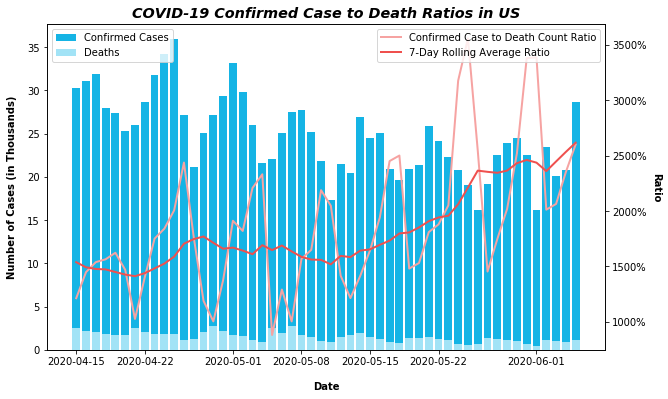

In [27]:
# Read CSV into pandas dataframe
date = datetime.now().strftime('%Y%m%d')
filename = "testing_data_{}.txt".format(date)
testing = pd.read_csv(filename)
testing = testing[['date','positiveIncrease','deathIncrease']]

# Add properly formatted date and sort by date
testing['datetime'] = pd.to_datetime(testing['date'], format='%Y%m%d')
testing = testing.sort_values(by=['date'],ascending=True)

# Generate incremental columns, testing percent positive (TPP) column, and rolling average column
testing['ptd_ratio']=100*testing['positiveIncrease']/testing['deathIncrease']
testing['roll_mean'] = testing.ptd_ratio.rolling(window=7).mean()

# slice
testing = testing[testing['datetime']>='2020-04-15']

# Plot the data
fig, ax1 = plt.subplots(figsize=(10,6))

# Number of Tests, Bars
ax1.bar(testing['datetime'],testing['positiveIncrease']/1000,color = '#15b4e5')
ax1.bar(testing['datetime'],testing['deathIncrease']/1000,color = '#a2e3f6')
ax1.set_xlabel('Date',fontweight='bold',labelpad = 15)
ax1.set_ylabel('Number of Cases (in Thousands)',fontweight='bold',labelpad = 10)

# TPP, Lines
ax2 = ax1.twinx()
ax2.plot(testing['datetime'],testing['ptd_ratio'],color = '#f6a3a2',linewidth = 2)
ax2.plot(testing['datetime'],testing['roll_mean'], color = '#ef504e',linewidth = 2)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
ax2.set_ylabel('Ratio',fontweight='bold',rotation='270',labelpad=15)

# ax1.legend(['Positive','Negative'],bbox_to_anchor=(0.5, -0.3),loc='lower left')
# ax2.legend(['Percent Positive','7-Day Rolling Average Percent Positive'],bbox_to_anchor=(0.5, -0.3),loc='lower right')

# Legend and Labels
ax1.legend(['Confirmed Cases','Deaths'],loc='upper left')
ax2.legend(['Confirmed Case to Death Count Ratio','7-Day Rolling Average Ratio'],loc='upper right')

plt.title('COVID-19 Confirmed Case to Death Ratios in US',fontweight = 'bold',fontstyle = 'italic',fontsize='x-large')
plt.savefig('US_Ratio_{}'.format(date))
testing.head(1000)

